# Siamese Neural Networks
Recognize images of icebergs from images of ships. 
These images were taken from space with a Sentinel-4 satellite. The goal was to create the most accurate neural network to differentiate them. However, neural networks usually only work well with A LOT of data, and I constrained you guys to 1000 examples to train on. That seems like a lot, but a CONVENTIONAL neural network needs more data. However, we are going to make a special kind of neural network: *Siamese Network*. This special network is used for face recognition and few-shot learning(learning from few examples). Let's get started by importing the usual liraries:

In [1]:
from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D,Activation, Dropout
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import Adam
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
ls -l

total 8
drwx------ 3 root root 4096 Dec  1 08:09 drive/
drwxr-xr-x 1 root root 4096 Nov 21 16:30 sample_data/


In [6]:
cd drive

/content/drive


In [7]:
ls -l

total 4
drwx------ 9 root root 4096 Dec  1 08:09 'My Drive'/


In [9]:
cd My Drive

/content/drive/My Drive


In [10]:
ls -l

total 507367
drwx------ 2 root root      4096 Nov  3 14:01  annotated/
drwx------ 2 root root      4096 Nov  2 05:53  coke/
drwx------ 2 root root      4096 Sep 26 01:18 'Colab Notebooks'/
-rw------- 1 root root   2287463 Sep 25  2016  G0010083.JPG
-rw------- 1 root root   2240782 Sep 25  2016  G0010084.JPG
-rw------- 1 root root   2413425 Sep 25  2016  G0010085.JPG
-rw------- 1 root root   2344967 Sep 25  2016  G0010086.JPG
-rw------- 1 root root   2326955 Sep 25  2016  G0010087.JPG
-rw------- 1 root root   2321748 Sep 25  2016  G0010088.JPG
-rw------- 1 root root   2446697 Sep 25  2016  G0020090.JPG
-rw------- 1 root root   2096652 Sep 25  2016  G0020091.JPG
-rw------- 1 root root   2338930 Sep 25  2016  G0020092.JPG
-rw------- 1 root root   2348055 Sep 25  2016  G0020093.JPG
-rw------- 1 root root   2196966 Sep 25  2016  G0020094.JPG
-rw------- 1 root root   2214932 Sep 25  2016  G0020095.JPG
-rw------- 1 root root   2254979 Sep 25  2016  G0020096.JPG
-rw------- 1 root root   220045

In [12]:
cd Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [13]:
ls -l

total 2249386
drwx------ 2 root root       4096 Oct 11 05:18 'ACV - I'/
drwx------ 2 root root       4096 Nov 17 09:07  ACVprj1/
drwx------ 2 root root       4096 Nov  2 18:04  capstone/
-rw------- 1 root root      10552 Oct 11 03:58 'CNN case study opencv.ipynb'
drwx------ 2 root root       4096 Oct  6 12:31  CNN-II/
-rw------- 1 root root     757085 Oct  6 13:49  ComputerVision_CNN_Project.ipynb
-rw------- 1 root root       7122 Oct  6 17:05 'Computer Vision with CNN_Project1.ipynb'
-rw------- 1 root root      15861 Oct  6 12:44 'Copy of CNN case study opencv.ipynb'
-rw------- 1 root root     739850 Oct  6 16:47 'Copy of ComputerVision_CNN_Project.ipynb'
drwx------ 2 root root       4096 Nov  3 06:38 'external lab'/
drwx------ 2 root root       4096 Oct  6 08:46  input/
drwx------ 2 root root       4096 Oct 20 05:58 'nlp statistical project'/
-rw------- 1 root root     186610 Sep 26 02:58  NNDL_Project2_25th_Sep.ipynb
drwx------ 2 root root       4096 Oct 26 17:16  phone/
drwx------ 

In [14]:
cd siamese_ext

/content/drive/My Drive/Colab Notebooks/siamese_ext


## Load the Data


In [15]:
npz = np.load('input_data.npz')
X_train = npz['X_train']
Y_train = npz['Y_train']
del npz
print ('We have {} examples to work with'.format(Y_train.shape[0]-1000))

We have 3113 examples to work with


## Check the data

Load some of the images to observe how your data look like.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

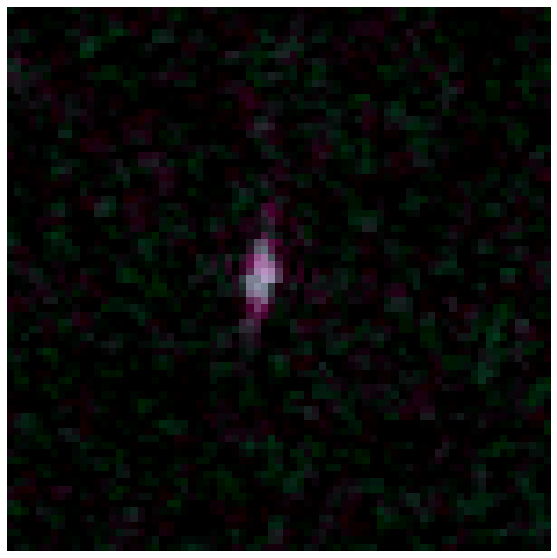

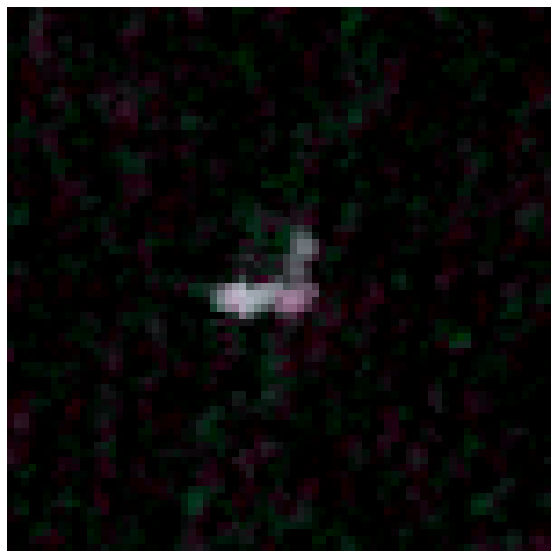

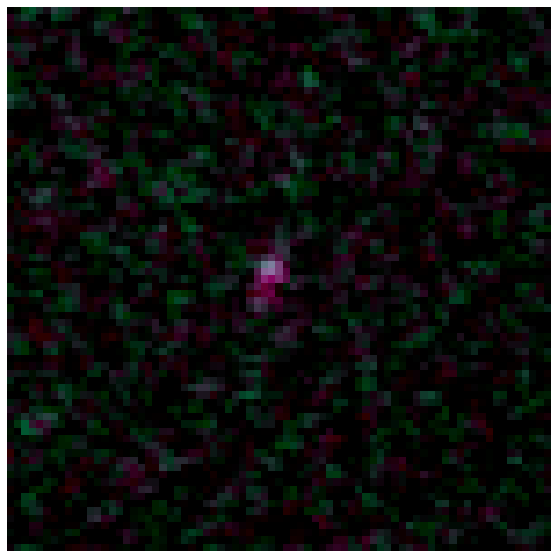

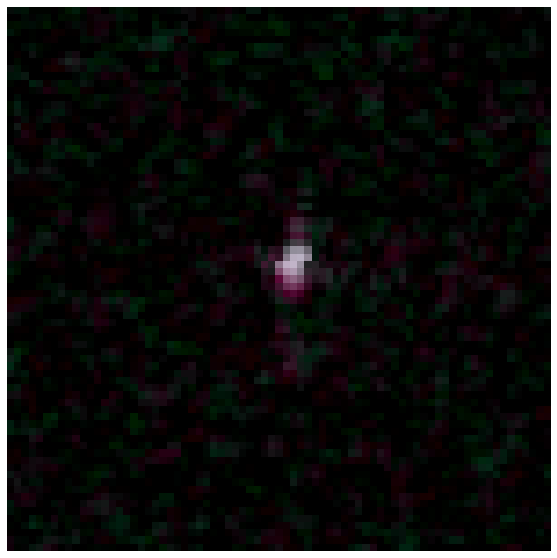

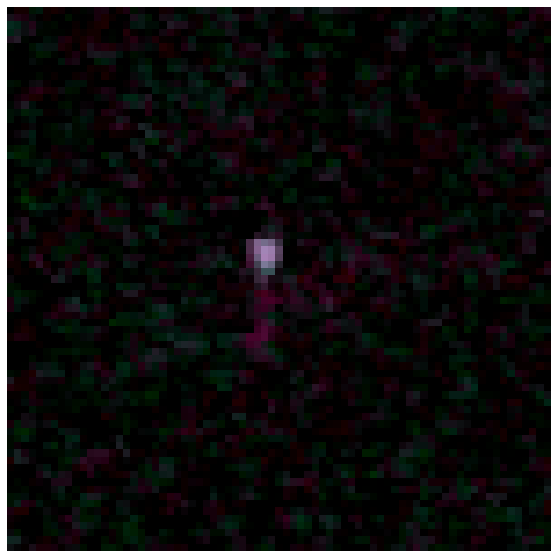

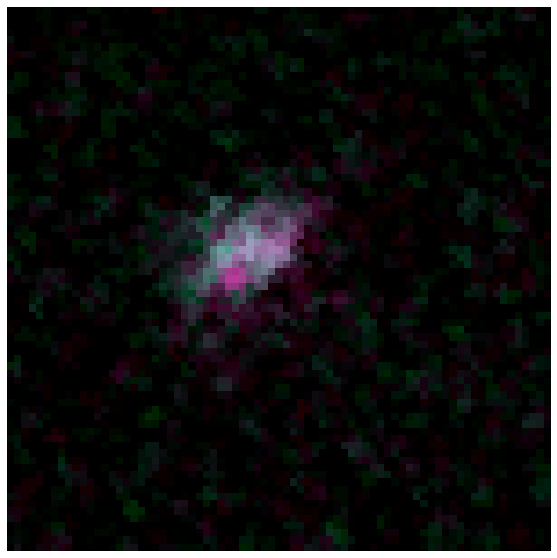

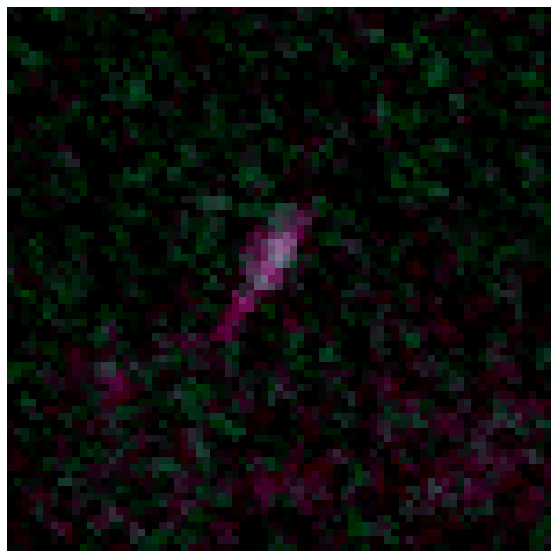

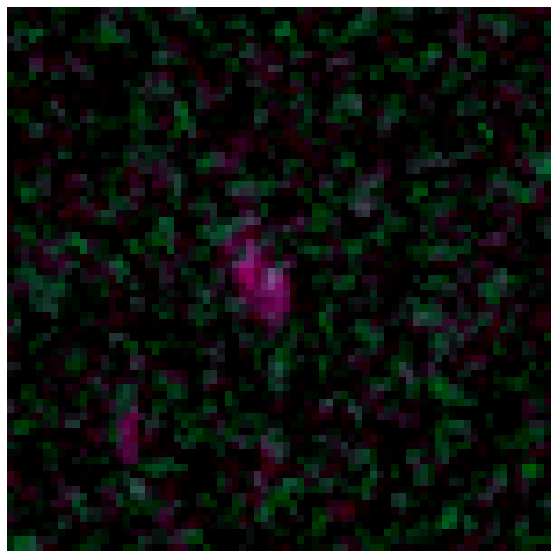

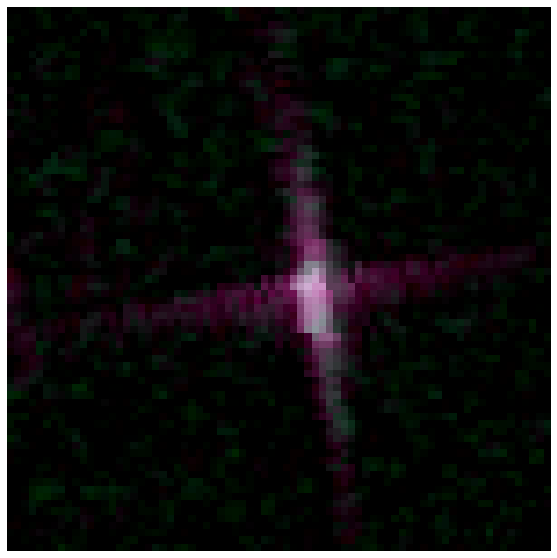

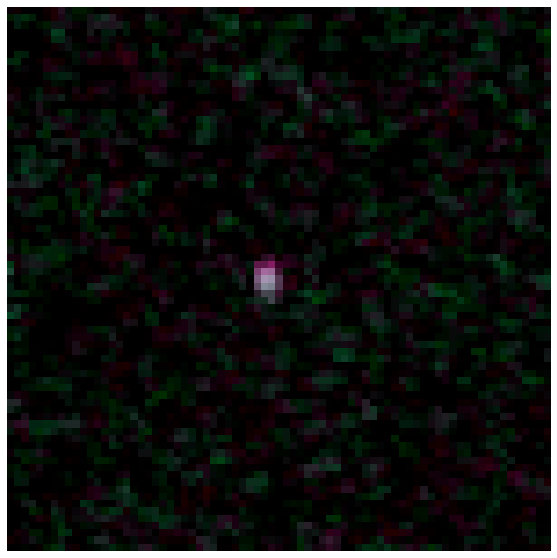

In [16]:

for i in range(1,11):
    plt.figure(figsize=(10,10))
#     plt.subplot(1,10,i)
    plt.axis("off")
    plt.imshow(X_train[i-1])

# Creating the structure of Siamese Network

You just need to break it into some steps:
1. 2 Inputs for each images
2. Creating a network which both images will go through individually
3. Couple the network to each input
4. Calculate the L1 distance between them. Just (x1,y1)-(x2,y2)
5. 1 Added layer that will say 1 if they are the same and 0 if they are different

# Create two Inputs for each image - left_input and right_input
Hint - use Input Function in Keras and keep the shape to be 75,75,3

In [0]:
left_input = Input((75,75,3))

In [0]:
right_input = Input((75,75,3))

# Create a base Network in which both images will go through individually.

Hint - Use Sequential Model in Keras with convolution layers, Maxpooling Layers, Flatten Layer and Denser Layer with appropriate activation functions.
Name the network as base_network

In [0]:

base_network = Sequential()

#convolutional layer 1
base_network.add(Conv2D(30, (3, 3), input_shape=(75, 75, 3), activation='relu'))
base_network.add(MaxPooling2D(pool_size=(2, 2)))
base_network.add(Dropout(.25))

#convolutional layer 2
base_network.add(Conv2D(30, (3, 3), input_shape=(75, 75, 3), activation='relu'))
base_network.add(MaxPooling2D(pool_size=(2, 2)))
base_network.add(Dropout(.25))

#flatten 
base_network.add(Flatten())
base_network.add(Dense(128, activation='relu'))
base_network.add(Dropout(0.1))
base_network.add(Dense(50, activation='relu'))

# Process the left and right inputs to the same Base Network(base_network)

In [0]:

processed_a = base_network(left_input)

In [0]:

processed_b = base_network(right_input)

# Get the L1 Distance layer between the 2 processed encodings (processed_a and processed_b)
Hint - You can use Lambda function for this.

In [0]:

# Getting the L1 Distance between the 2 encodings
L1_layer = Lambda(lambda tensor:K.abs(tensor[0] - tensor[1]))


# Add the distance function to the network
L1_distance = L1_layer([processed_a, processed_b])

# Add the prediction layer in the end and create the Siamese Network using Model function.

In [0]:

prediction = Dense(1,activation='sigmoid')(L1_distance)
siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

# Define the Optimizer Adam and Compile the Siamese Model.

In [29]:
optimizer = Adam(0.001, decay=2.5e-4)

siamese_net.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Show the Summary of your Siamese Network

In [31]:

siamese_net.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 50)           1125308     input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 50)           0           sequential_2[1][0]         

# Creating the Pair of Images to train on

It's not time to train though. We still have to create pairs of images to train on. There will be Positive(the same class) or Negative(different classes) for outputs. Let's construct this dataset. It is recommended that there are equal amounts positive and negative.

In [0]:
# First let's separate the dataset from 1 matrix to a list of matricies
image_list = np.split(X_train[:1000],1000)
label_list = np.split(Y_train[:1000],1000)

left_input = []
right_input = []
targets = []

#Number of pairs per image
pairs = 5
#Let's create the new dataset to train on
for i in range(len(label_list)):
    for _ in range(pairs):
        compare_to = i
        while compare_to == i: #Make sure it's not comparing to itself
            compare_to = random.randint(0,999)
        left_input.append(image_list[i])
        right_input.append(image_list[compare_to])
        if label_list[i] == label_list[compare_to]:# They are the same
            targets.append(1.)
        else:# Not the same
            targets.append(0.)
            
left_input = np.squeeze(np.array(left_input))
right_input = np.squeeze(np.array(right_input))
targets = np.squeeze(np.array(targets))

iceimage = X_train[101]
test_left = []
test_right = []
test_targets = []

for i in range(Y_train.shape[0]-1000):
    test_left.append(iceimage)
    test_right.append(X_train[i+1000])
    test_targets.append(Y_train[i+1000])

test_left = np.squeeze(np.array(test_left))
test_right = np.squeeze(np.array(test_right))
test_targets = np.squeeze(np.array(test_targets))

Now we have a lot more examples.
Now we have pairs x 1000 examples to train the network on. 
Each side will have an input of an image and the output will be one if they are the same and zero if not.

# Train the Siamese train on left and right input image pairs created and validate it by test pairs.

In [33]:

siamese_net.fit([left_input,right_input], targets,
          batch_size=16,
          epochs=10,
          verbose=1,
          validation_data=([test_left,test_right],test_targets))




Train on 5000 samples, validate on 3113 samples
Epoch 1/10





5000/5000 [==============================] - 80s 16ms/step - loss: 0.6891 - acc: 0.5542 - val_loss: 0.7029 - val_acc: 0.4427
Epoch 2/10
5000/5000 [==============================] - 78s 16ms/step - loss: 0.6140 - acc: 0.6648 - val_loss: 0.6507 - val_acc: 0.6412
Epoch 3/10
5000/5000 [==============================] - 78s 16ms/step - loss: 0.4590 - acc: 0.7948 - val_loss: 0.5500 - val_acc: 0.7568
Epoch 4/10
5000/5000 [==============================] - 78s 16ms/step - loss: 0.2464 - acc: 0.9152 - val_loss: 0.5610 - val_acc: 0.7806
Epoch 5/10
5000/5000 [==============================] - 78s 16ms/step - loss: 0.1415 - acc: 0.9562 - val_loss: 0.5901 - val_acc: 0.7925
Epoch 6/10
5000/5000 [==============================] - 78s 16ms/step - loss: 0.0960 - acc: 0.9716 - val_loss: 0.6681 - val_acc: 0.7703
Epoch 7/10
5000/5000 [==============================] - 78s 16ms/step - loss: 0.0654 - acc: 0.9834 - val_loss: 0.8080 - val_acc: